# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [50]:
# Checking the number of mice

mice_count = combined_data['Mouse ID'].nunique()
print(mice_count)

249


In [51]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated()]["Mouse ID"]
duplicate_mice.unique()

array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study = combined_data[combined_data["Mouse ID"] != "g989"]
cleaned_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [77]:
# Checking the number of mice in the clean DataFrame.
cleaned_study["Mouse ID"].nunique()

248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
#pd.DataFrame()

In [84]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

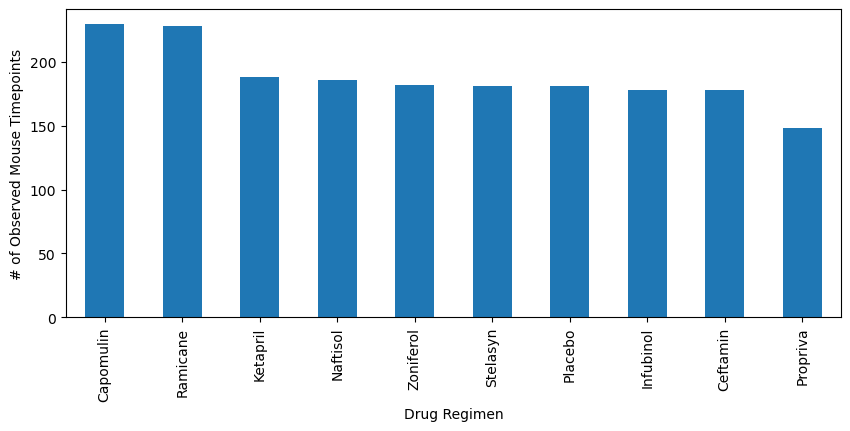

In [90]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_time = cleaned_study["Drug Regimen"].value_counts()
#drug_time = drug_time.set_index('Drug Regimen')
#create a bar plot
drug_time.plot(kind='bar', figsize=(10, 4))
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

Text(0, 0.5, '# of Observed Mouse Timepoints')

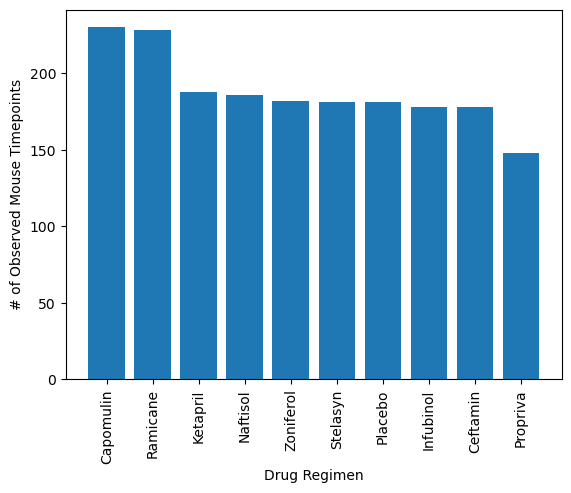

In [109]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_time = cleaned_study["Drug Regimen"].value_counts()
plt.bar(drug_time.index.values, drug_time.values)

#tick_locations = [x for x in drug_reg]
#plt.xticks(tick_loc, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
#plt.xlim(-0.5, len(drug_reg)+0.5)
#plt.ylim(0, max(Timepoints)*1.1)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

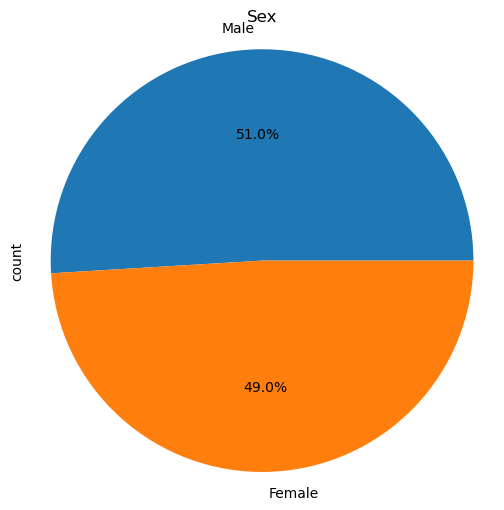

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = cleaned_study["Sex"].value_counts()

mouse_sex.plot(kind="pie", labels=["Male", "Female"],
        autopct="%1.1f%%", title="Sex",
                  figsize=(6,6))

plt.axis("equal")
plt.show()

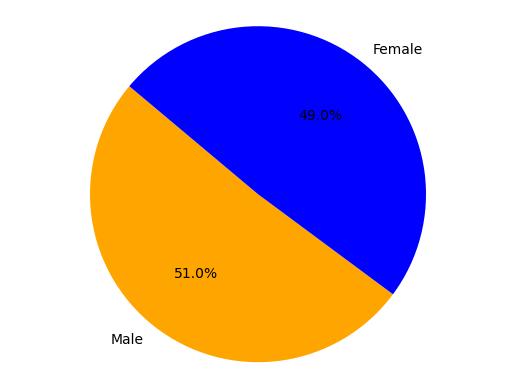

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
colors = ["orange", "blue"]
plt.pie(cleaned_study["Sex"].value_counts(), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [1]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_df = cleaned_study.groupby([treatment, 'Tumor Volume (mm3)', 'Mouse ID'])
# Start by getting the last (greatest) timepoint for each mouse
tumor_vol_df
#, 'Ramicane', 'Infubinol', 'Ceftamin'
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_df = pd.merge(cleaned_study, , on='', how='')

SyntaxError: invalid syntax (1093651829.py, line 9)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
[for in]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
qs = np.quantile(x, [0.25, 0.5, 0.75])
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]
iqr = q3 -q1
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

#print outiers
print(f"Capomulins potential outliers: {}")
print(f"Ramicanes potential outliers: {}")
print(f"Infubinols potential outliers: {}")
print(f"Ceftamins potential outliers: {}")

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Plot the box plots for each dataset
axs[0].boxplot(data1)
axs[0].set_title('Capomulin')

axs[1].boxplot(data2)
axs[1].set_title('Ramicane')

axs[2].boxplot(data3)
axs[2].set_title('Infubinol')

axs[3].boxplot(data3)
axs[3].set_title('Ceftamin')

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(x, y)
plt.xlabel('Timepoint (days)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {Mouse ID}')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(, y)

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Create the linear regression model
regress_values = x_values * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x,y)
plt.plot(x,y,"r-")

# Label plot and annotate the line equation
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.text(0.5, 0.9, f'The correlation between mouse weight and the average tumor volume is : {correlation_coefficient}', transform=plt.gca().transAxes)
plt.show()